## TEMPLATE MATCHING

##### it scans a larger image for provided template by sliding the template target image across the larger image

In [1]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
full = cv2.imread('DATA/sammy.jpg')
full = cv2.cvtColor(full,cv2.COLOR_BGR2RGB)

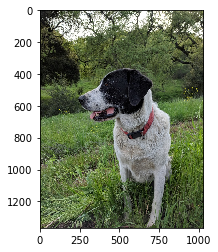

In [5]:
plt.imshow(full)

In [6]:
face = cv2.imread('DATA/sammy_face.jpg')
face = cv2.cvtColor(face,cv2.COLOR_BGR2RGB)

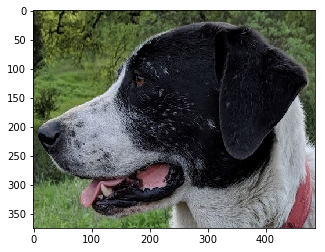

In [7]:
plt.imshow(face)

In [8]:

# All the 6 methods for comparison in a list
# Note how we are using strings, later on we'll use the eval() function to convert to function
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR','cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

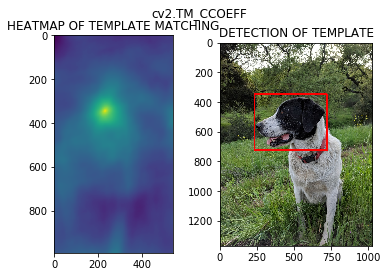

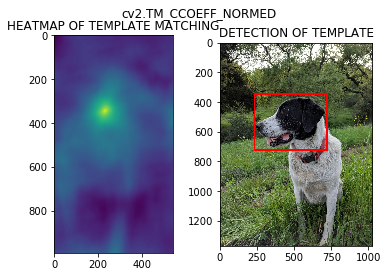

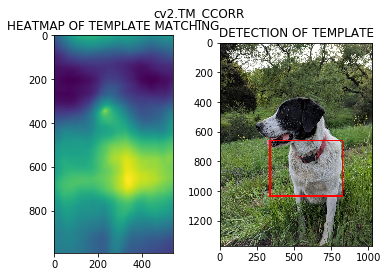

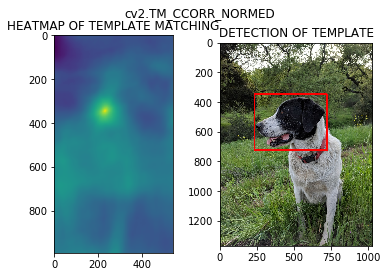

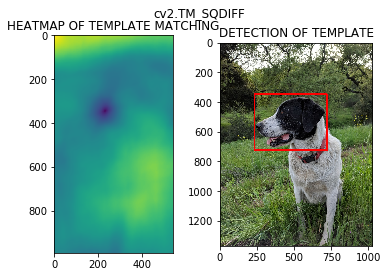

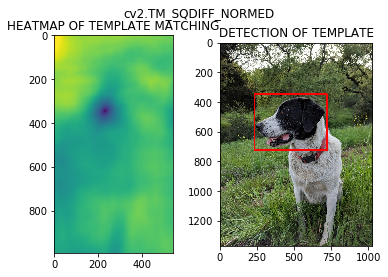

In [12]:
for m in methods:
    
    # CREATE A COPY
    full_copy = full.copy()
    
    method = eval(m)
    
    # TEMPLATE MATCHING
    res = cv2.matchTemplate(full_copy,face,method)
    
    min_val,max_val,min_loc,max_loc = cv2.minMaxLoc(res)
    
    if method in [cv2.TM_SQDIFF , cv2.TM_SQDIFF_NORMED]: # these 2 methods work in opposite to the other method so we grab the minimum loc not the max
        top_left = min_loc
    else:
        top_left = max_loc
        
    height,width,channels = face.shape
    
    bottom_right = (top_left[0]+width , top_left[1]+height)
    
    cv2.rectangle(full_copy , top_left,bottom_right,(255,0,0),10)
    
    # PLOT AND SHOW THE IMAGES
    
    plt.subplot(121)
    plt.imshow(res)
    plt.title("HEATMAP OF TEMPLATE MATCHING")
        
    plt.subplot(122)
    plt.imshow(full_copy)
    plt.title('DETECTION OF TEMPLATE')
    
    # TITLE WITH THE USED METHOD
    plt.suptitle(m)
    
    plt.show()
    
    print('\n')
    print('\n')
    

    
    
     
    
    

## CORNER DETECTION

## 1) HARRIS CORNER DETECTION

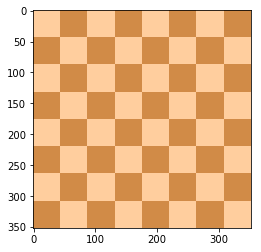

In [14]:
flat_chessboard = cv2.imread('DATA/flat_chessboard.png')
flat_chessboard = cv2.cvtColor(flat_chessboard,cv2.COLOR_BGR2RGB)
plt.imshow(flat_chessboard)

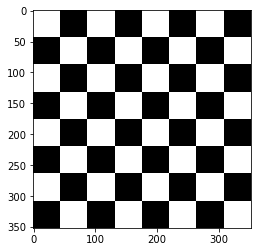

In [21]:
gray_flat_chessboard = cv2.cvtColor(flat_chessboard,cv2.COLOR_BGR2GRAY)
plt.imshow(gray_flat_chessboard ,cmap='gray')


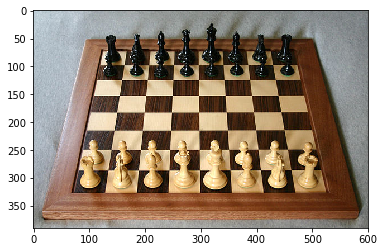

In [22]:
real_chess = cv2.imread('DATA/real_chessboard.jpg')
real_chess = cv2.cvtColor(real_chess,cv2.COLOR_BGR2RGB)
plt.imshow(real_chess)

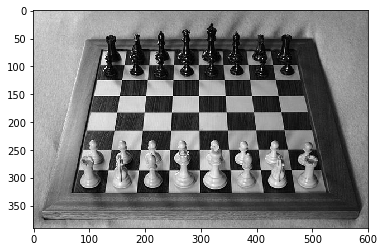

In [23]:
gray_real_chess = cv2.cvtColor(real_chess,cv2.COLOR_BGR2GRAY)
plt.imshow(gray_real_chess ,cmap='gray')


In [24]:
# WE should turn the gray images to float

gray = np.float32(gray_flat_chessboard)

In [25]:
dst = cv2.cornerHarris(src = gray , blockSize = 2,ksize = 3 ,k=0.04)

In [26]:
dst = cv2.dilate(dst,None)

In [27]:
flat_chessboard[dst>0.01*dst.max()] = [255,0,0] #RGB

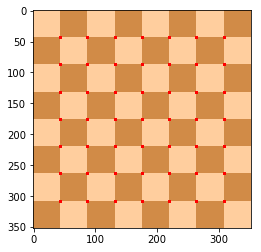

In [28]:
plt.imshow(flat_chessboard)

In [29]:
gray = np.float32(gray_real_chess)

In [30]:
dst = cv2.cornerHarris(src = gray , blockSize = 2 ,ksize = 3 , k =0.04)

In [31]:
dst = cv2.dilate(dst,None)

In [32]:
real_chess[dst>0.01*dst.max()] = [255,0,0]

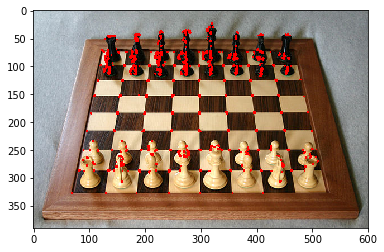

In [33]:
plt.imshow(real_chess)

## 2) SHI-TOMASI DETECTION 

In [36]:
flat_chess = cv2.imread('DATA/flat_chessboard.png')
flat_chess = cv2.cvtColor(flat_chess,cv2.COLOR_BGR2RGB)

real_chess = cv2.imread('DATA/real_chessboard.jpg')
real_chess = cv2.cvtColor(real_chess,cv2.COLOR_BGR2RGB)


gray_flat_chess = cv2.cvtColor(flat_chess,cv2.COLOR_BGR2GRAY)
gray_real_chess = cv2.cvtColor(real_chess,cv2.COLOR_BGR2GRAY)

In [42]:
# number 64 is the number of corners we want to find 
# if we want to find all the corners we will put -1
corners = cv2.goodFeaturesToTrack(gray_flat_chess,64,0.01,10)

In [43]:
corners =np.int0(corners)

In [44]:
for i in corners:
    x,y = i.ravel()
    cv2.circle(flat_chess,(x,y),3,(255,0,0),-1)

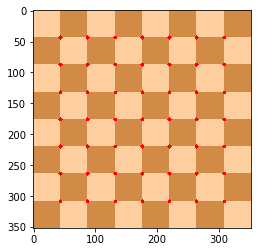

In [45]:
plt.imshow(flat_chess)

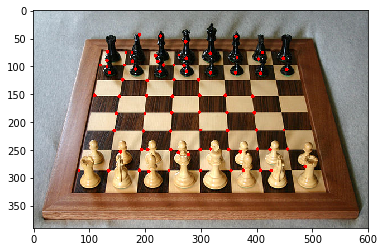

In [47]:
corners = cv2.goodFeaturesToTrack(gray_real_chess,80,0.01,10)
corners =np.int0(corners)
for i in corners:
    x,y = i.ravel()
    cv2.circle(real_chess,(x,y),3,(255,0,0),-1)
plt.imshow(real_chess)

## EDGE DETECTION

### CANNY EDGE DETECTOR

##### STEPS :
##### 1) apply gaussian filter to smooth the image in order to remove the noise
##### 2) find the intensity gradients of the image
##### 3) apply non-maximum suppression to get rid of spurious response to edge detector
##### 4) apply double threshold to determine potential edges
##### 5) Track edge by hysteresis : finalize the detection of edges by suppressing all the other edges that are weak and not connected to strong edges

##### NOTE : for high resolution image apply custom blur before doing canny edge detection

In [48]:
img = cv2.imread('DATA/sammy_face.jpg')

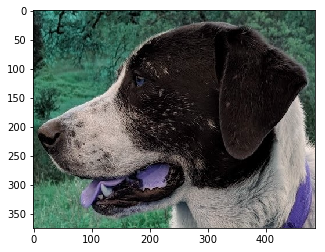

In [49]:
plt.imshow(img)

In [50]:
edges = cv2.Canny(image = img , threshold1 = 127,threshold2 = 127)


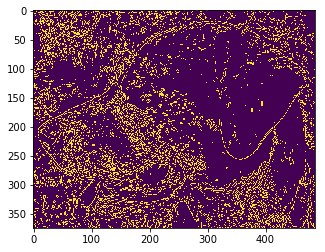

In [51]:
plt.imshow(edges)

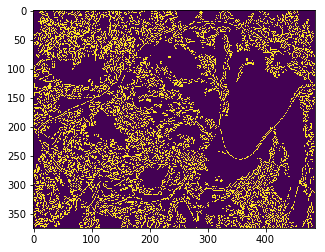

In [52]:
edges = cv2.Canny(image = img , threshold1 = 0,threshold2 = 255)
plt.imshow(edges)


In [53]:
med_val = np.median(img)

In [54]:
med_val

64.0

In [55]:
# these values shows the best accuracy after blurring the image

lower = int(max(0,0.7*med_val))

upper = int(min(255,1.3*med_val))


In [56]:
 blurred_img = cv2.blur(img,ksize = (5,5))

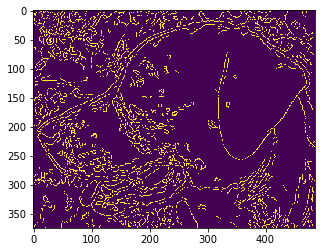

In [57]:
edges = cv2.Canny(image = blurred_img , threshold1 = lower,threshold2 = upper)
plt.imshow(edges)

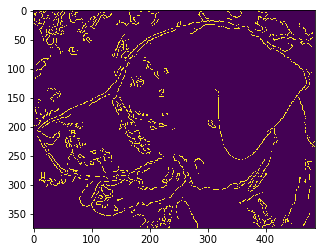

In [60]:
# if we want to get rid of more noise we can increase the upper limit 
edges = cv2.Canny(image = blurred_img , threshold1 = lower,threshold2 = upper+50)
plt.imshow(edges)

### GRID DETECTION

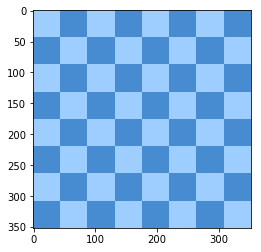

In [61]:
# it is used to calibrate the camera and track the motion
flat_chess = cv2.imread('DATA/flat_chessboard.png')
plt.imshow(flat_chess)

In [62]:
# every (some) shape has its own functions
found , corners = cv2.findChessboardCorners(flat_chess,(7,7))

In [63]:
corners

array([[[ 43.500004,  43.500004]],

       [[ 87.5     ,  43.5     ]],

       [[131.5     ,  43.5     ]],

       [[175.5     ,  43.5     ]],

       [[219.5     ,  43.5     ]],

       [[263.5     ,  43.5     ]],

       [[307.5     ,  43.5     ]],

       [[ 43.499996,  87.50001 ]],

       [[ 87.5     ,  87.5     ]],

       [[131.5     ,  87.5     ]],

       [[175.5     ,  87.5     ]],

       [[219.5     ,  87.5     ]],

       [[263.5     ,  87.5     ]],

       [[307.5     ,  87.49999 ]],

       [[ 43.500004, 131.5     ]],

       [[ 87.5     , 131.5     ]],

       [[131.5     , 131.5     ]],

       [[175.5     , 131.5     ]],

       [[219.5     , 131.5     ]],

       [[263.5     , 131.5     ]],

       [[307.5     , 131.5     ]],

       [[ 43.499996, 175.5     ]],

       [[ 87.5     , 175.5     ]],

       [[131.5     , 175.5     ]],

       [[175.5     , 175.5     ]],

       [[219.5     , 175.5     ]],

       [[263.5     , 175.5     ]],

       [[307.5     , 175.5  

In [64]:
cv2.drawChessboardCorners(flat_chess,(7,7),corners,found)

array([[[158, 206, 255],
        [158, 206, 255],
        [158, 206, 255],
        ...,
        [ 71, 139, 209],
        [ 71, 139, 209],
        [ 71, 139, 209]],

       [[158, 206, 255],
        [158, 206, 255],
        [158, 206, 255],
        ...,
        [ 71, 139, 209],
        [ 71, 139, 209],
        [ 71, 139, 209]],

       [[158, 206, 255],
        [158, 206, 255],
        [158, 206, 255],
        ...,
        [ 71, 139, 209],
        [ 71, 139, 209],
        [ 71, 139, 209]],

       ...,

       [[ 71, 139, 209],
        [ 71, 139, 209],
        [ 71, 139, 209],
        ...,
        [158, 206, 255],
        [158, 206, 255],
        [158, 206, 255]],

       [[ 71, 139, 209],
        [ 71, 139, 209],
        [ 71, 139, 209],
        ...,
        [158, 206, 255],
        [158, 206, 255],
        [158, 206, 255]],

       [[ 71, 139, 209],
        [ 71, 139, 209],
        [ 71, 139, 209],
        ...,
        [158, 206, 255],
        [158, 206, 255],
        [158, 206, 255]]

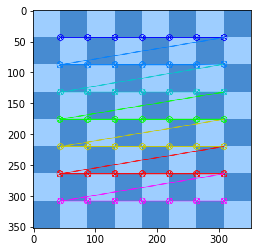

In [65]:
plt.imshow(flat_chess)

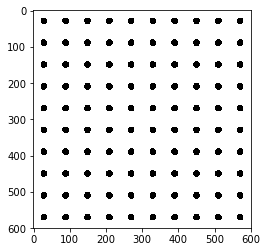

In [66]:
dots = cv2.imread('DATA/dot_grid.png')
plt.imshow(dots)

In [71]:
found,corners = cv2.findCirclesGrid(dots,(10,10),cv2.CALIB_CB_SYMMETRIC_GRID)

In [72]:
found



True

In [73]:
cv2.drawChessboardCorners(dots,(10,10),corners,found)

array([[[  1, 199, 201],
        [  0, 199, 201],
        [  1, 199, 201],
        ...,
        [ 16, 145, 223],
        [ 16, 145, 223],
        [ 17, 145, 222]],

       [[  0, 199, 200],
        [  0, 200, 200],
        [  0, 199, 201],
        ...,
        [  5, 199, 201],
        [  5, 199, 201],
        [  6, 199, 201]],

       [[  0, 199, 199],
        [  0, 200, 200],
        [  0, 200, 200],
        ...,
        [ 76, 217, 217],
        [ 76, 217, 217],
        [ 78, 217, 217]],

       ...,

       [[255,   2,   2],
        [255, 152, 152],
        [255, 255, 255],
        ...,
        [  0, 128, 255],
        [173, 121, 217],
        [255, 255, 255]],

       [[255,   2,   2],
        [255, 152, 152],
        [255, 255, 255],
        ...,
        [181, 129, 218],
        [  0, 128, 255],
        [173, 121, 217]],

       [[255,   2,   2],
        [255, 152, 152],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [183, 131, 218],
        [  0, 128, 255]]

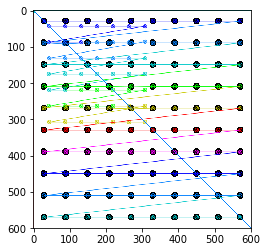

In [74]:
plt.imshow(dots)

### CONTOUR DETECTION

##### Contours : a curve joining all the continous points (along the boundary), having the same colors or intensity

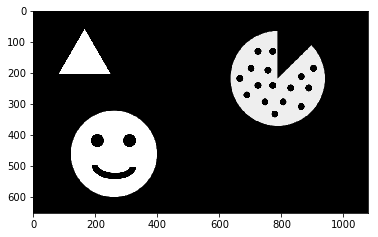

In [76]:
img = cv2.imread('DATA/internal_external.png' , 0)
plt.imshow(img , cmap ='gray')

In [79]:
# CCOMP ---> grab internal and external contours
contours,hierarchy = cv2.findContours(img,cv2.RETR_CCOMP,cv2.CHAIN_APPROX_SIMPLE)

In [80]:
# -1 means the external contours
# 0 means the smiling face
# 4 means the peproni chips
hierarchy

array([[[ 4, -1,  1, -1],
        [ 2, -1, -1,  0],
        [ 3,  1, -1,  0],
        [-1,  2, -1,  0],
        [21,  0,  5, -1],
        [ 6, -1, -1,  4],
        [ 7,  5, -1,  4],
        [ 8,  6, -1,  4],
        [ 9,  7, -1,  4],
        [10,  8, -1,  4],
        [11,  9, -1,  4],
        [12, 10, -1,  4],
        [13, 11, -1,  4],
        [14, 12, -1,  4],
        [15, 13, -1,  4],
        [16, 14, -1,  4],
        [17, 15, -1,  4],
        [18, 16, -1,  4],
        [19, 17, -1,  4],
        [20, 18, -1,  4],
        [-1, 19, -1,  4],
        [-1,  4, -1, -1]]], dtype=int32)

In [81]:
external_contours = np.zeros(img.shape)

In [82]:
for i in range(len(contours)):
    
    # EXTERNAL CONTOUR
    if hierarchy[0][i][3] == -1:
        
        cv2.drawContours(external_contours,contours,i,255,-1)

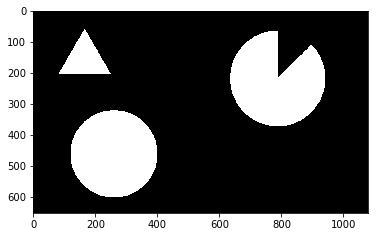

In [84]:
plt.imshow(external_contours,cmap='gray')

In [85]:
internal_contours = np.zeros(img.shape)

for i in range(len(contours)):
    
    # INTERNAL CONTOUR
    if hierarchy[0][i][3] != -1:
        
        cv2.drawContours(internal_contours,contours,i,255,-1)

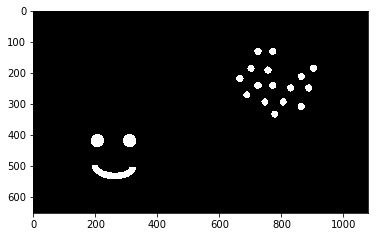

In [87]:
plt.imshow(internal_contours , cmap ='gray')

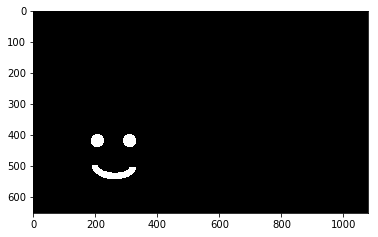

In [89]:
smile_contours = np.zeros(img.shape)

for i in range(len(contours)):
    
    # SMILE CONTOUR
    if hierarchy[0][i][3] == 0:
        
        cv2.drawContours(smile_contours,contours,i,255,-1)
        
plt.imshow(smile_contours , cmap ='gray')

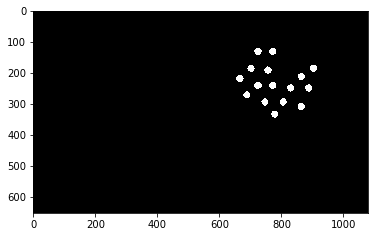

In [90]:
peproni_contours = np.zeros(img.shape)

for i in range(len(contours)):
    
    # PEPRONI CONTOUR
    if hierarchy[0][i][3] == 4:
        
        cv2.drawContours(peproni_contours,contours,i,255,-1)
        
plt.imshow(peproni_contours , cmap ='gray')

## FEATURE MATCHING

#### feature matching extracts defining key features from an input image (using corner , edge and contour detection) then using a distance calculation that finds all the matches in a secondary image ---> this means that we are no longer required to have an exact copy of the target image

In [2]:
def display(img , cmap = 'gray'):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap = 'gray')

In [3]:
reeses = cv2.imread('DATA/reeses_puffs.png',0)

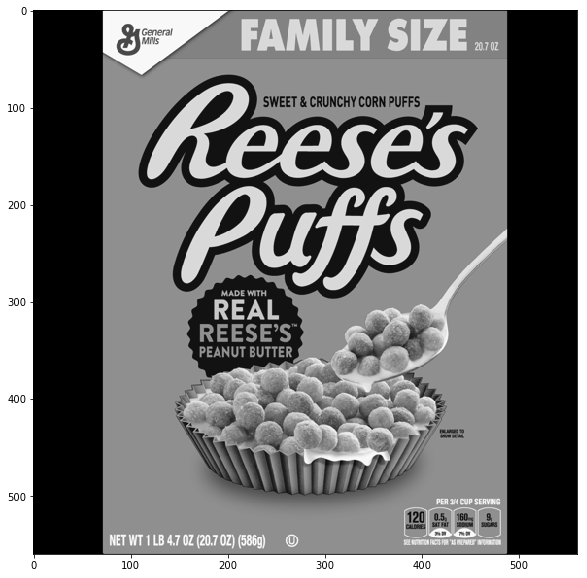

In [4]:
display(reeses)

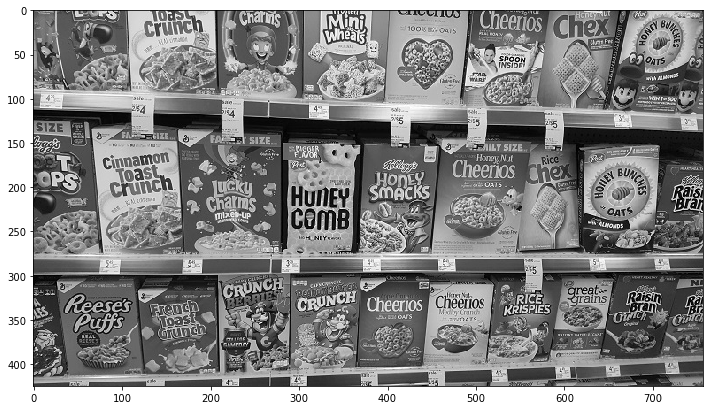

In [5]:
cereals = cv2.imread('DATA/many_cereals.jpg',0)
display(cereals)

### 1) brute force matching with ORB Descriptors

In [6]:
orb = cv2.ORB_create()

In [7]:
kp1,des1 = orb.detectAndCompute(reeses,None)
kp2,des2 = orb.detectAndCompute(cereals,None)

In [8]:
bf = cv2.BFMatcher(cv2.NORM_HAMMING,crossCheck=True)

In [9]:
matches = bf.match(des1,des2)

In [10]:
# sort the matches from lower distance to larger
matches = sorted(matches,key = lambda x:x.distance)

In [11]:
# length of all matches = 265 so we are making slicing to the matches and take the first 25 from them
reeses_matches = cv2.drawMatches(reeses,kp1,cereals,kp2,matches[:25],None,flags = 2) 

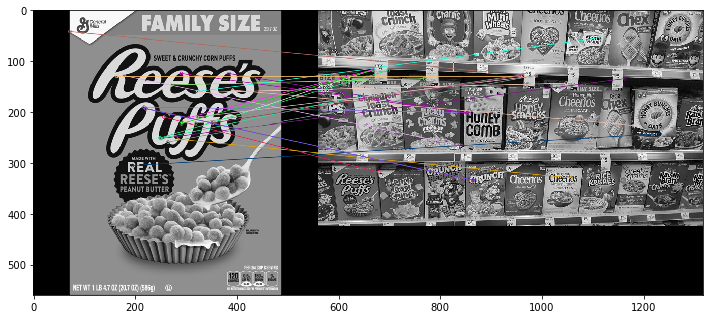

In [12]:
display(reeses_matches)

#### Note that this method is not working well in this kind of image because target image is not 100% like the small image and there are wrong matches with the largest img 

## 2) brute force matching with SIFT Descriptors and ratio test ----> SIFT : scale invariant feature transform

In [13]:
 sift = cv2.xfeatures2d.SIFT_create()

In [15]:
kp1,des1 = sift.detectAndCompute(reeses,None)
kp2,des2 = sift.detectAndCompute(cereals,None)

In [16]:
bf = cv2.BFMatcher()

In [17]:
matches = bf.knnMatch(des1,des2,k=2)

In [18]:
matches

[[<DMatch 0x7f2b9f20bfb0>, <DMatch 0x7f2b9f20bbb0>],
 [<DMatch 0x7f2b9f20bf90>, <DMatch 0x7f2b9f20bf50>],
 [<DMatch 0x7f2b9f20be30>, <DMatch 0x7f2b9c340070>],
 [<DMatch 0x7f2b9c340050>, <DMatch 0x7f2b9c340030>],
 [<DMatch 0x7f2b9c3400b0>, <DMatch 0x7f2b9c3400d0>],
 [<DMatch 0x7f2b9c340110>, <DMatch 0x7f2b9c3400f0>],
 [<DMatch 0x7f2b9c340130>, <DMatch 0x7f2b9c340150>],
 [<DMatch 0x7f2b9c340170>, <DMatch 0x7f2b9c340190>],
 [<DMatch 0x7f2b9c3401b0>, <DMatch 0x7f2b9c3401d0>],
 [<DMatch 0x7f2b9c3401f0>, <DMatch 0x7f2b9c340210>],
 [<DMatch 0x7f2b9c340230>, <DMatch 0x7f2b9c340250>],
 [<DMatch 0x7f2b9c340270>, <DMatch 0x7f2b9c340290>],
 [<DMatch 0x7f2b9c3402b0>, <DMatch 0x7f2b9c3402d0>],
 [<DMatch 0x7f2b9c3402f0>, <DMatch 0x7f2b9c340310>],
 [<DMatch 0x7f2b9c340330>, <DMatch 0x7f2b9c340350>],
 [<DMatch 0x7f2b9c340370>, <DMatch 0x7f2b9c340390>],
 [<DMatch 0x7f2b9c3403b0>, <DMatch 0x7f2b9c3403d0>],
 [<DMatch 0x7f2b9c3403f0>, <DMatch 0x7f2b9c340410>],
 [<DMatch 0x7f2b9c340430>, <DMatch 0x7f2b9c340

In [19]:
good = []

# RATIO TEST
# LESS DISTANCE == BETTER MATCH
# RATIO MATCH1 < 75% MATCH2
for match1,match2 in matches:
     # if match1 distance is less than 75% of match2 distance
     # then descriptor was a good match so we will keep it  
    if match1.distance < 0.75 * match2.distance:
        
        good.append([match1])

In [20]:
len(good)

79

In [21]:
len(matches)

1501

In [22]:
sift_matches = cv2.drawMatchesKnn(reeses,kp1,cereals,kp2,good,None,flags = 2) 


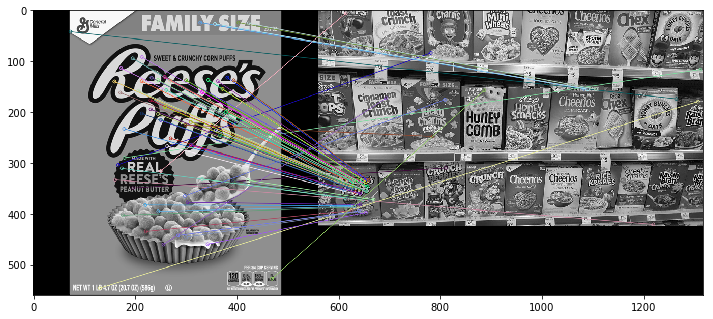

In [23]:
# NOTE THAT its performane is better than the other
display(sift_matches)

### 3) FLANN based matcher
#### FLANN : fast library for approximate nearest neighbor

In [24]:
sift = cv2.xfeatures2d.SIFT_create()
kp1,des1 = sift.detectAndCompute(reeses,None)
kp2,des2 = sift.detectAndCompute(cereals,None)

In [25]:
# FLANN PARAMETERS
FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm = FLANN_INDEX_KDTREE,trees = 5)
search_params = dict(checks=50)

In [26]:
flann = cv2.FlannBasedMatcher(index_params,search_params)

In [27]:
matches = flann.knnMatch(des1,des2,k=2)

In [28]:
good = []

# RATIO TEST
# LESS DISTANCE == BETTER MATCH
# RATIO MATCH1 < 75% MATCH2
for match1,match2 in matches:
     # if match1 distance is less than 75% of match2 distance
     # then descriptor was a good match so we will keep it  
    if match1.distance < 0.7 * match2.distance:
        
        good.append([match1])

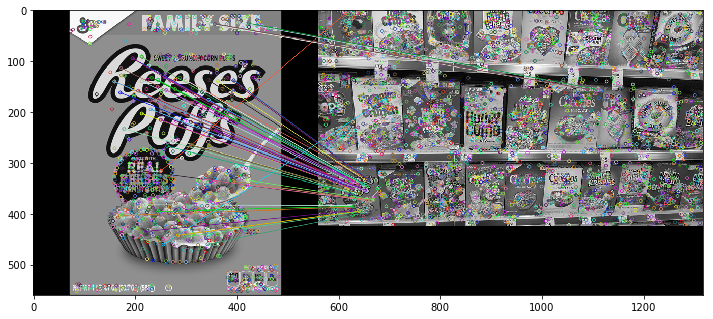

In [29]:
flann_matches = cv2.drawMatchesKnn(reeses,kp1,cereals,kp2,good,None, flags = 0)
display(flann_matches)

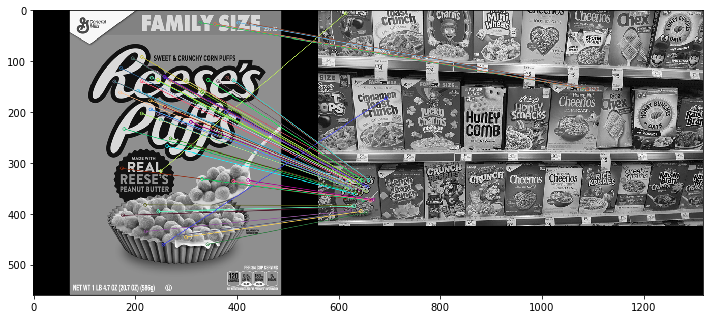

In [30]:
flann_matches = cv2.drawMatchesKnn(reeses,kp1,cereals,kp2,good,None, flags = 2)
display(flann_matches)

In [31]:
## ANOTHER METHOD USING MASK
sift = cv2.xfeatures2d.SIFT_create()
kp1,des1 = sift.detectAndCompute(reeses,None)
kp2,des2 = sift.detectAndCompute(cereals,None)

In [32]:
# FLANN PARAMETERS
FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm = FLANN_INDEX_KDTREE,trees = 5)
search_params = dict(checks=50)

In [33]:
flann = cv2.FlannBasedMatcher(index_params,search_params)

In [34]:
matches = flann.knnMatch(des1,des2,k=2)

In [35]:
matchesMask = [[0,0] for i in range(len(matches))]

In [36]:

# RATIO TEST
# LESS DISTANCE == BETTER MATCH
# RATIO MATCH1 < 75% MATCH2
for i,(match1,match2) in enumerate(matches):
     # if match1 distance is less than 75% of match2 distance
     # then descriptor was a good match so we will keep it  
    if match1.distance < 0.7 * match2.distance:
        matchesMask[i] = [1,0]
        
        

In [37]:
draw_params = dict(matchColor=(0,255,0),
                  singlePointColor = (255,0,0),
                  matchesMask =matchesMask,
                  flags = 0)

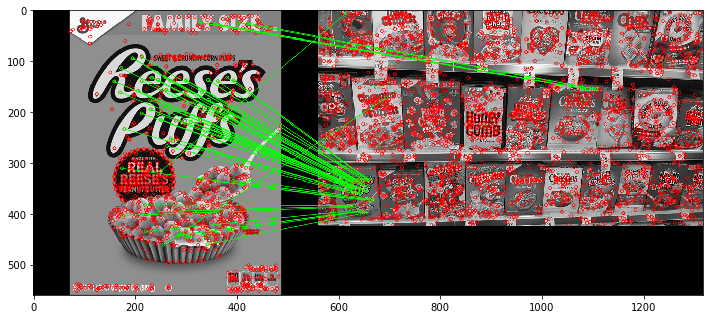

In [38]:
flann_matches = cv2.drawMatchesKnn(reeses,kp1,cereals,kp2,matches,None, **draw_params)
display(flann_matches)

### WATERSHED ALGORITHM
#### it is very useful in segmentation of images

In [39]:
sep_coins = cv2.imread('DATA/pennies.jpg')

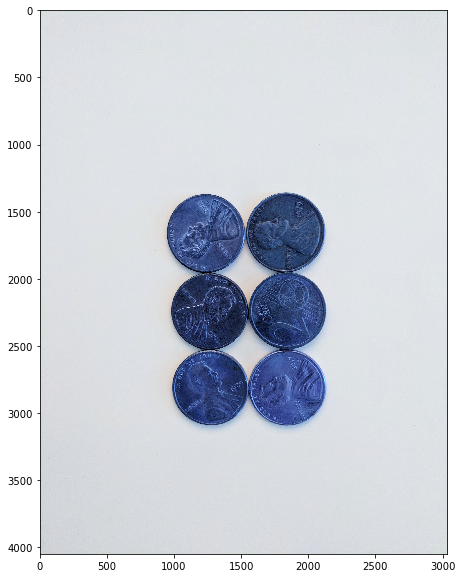

In [40]:
# since the coins are too close to each other so some computer vision algorithms deal with it as one block not 6 coins 
# so this algorithm will help the computer to see that there are 6 coins not single block
display(sep_coins)

In [41]:
# we will segment this image to 7 segments ---> 6 for the coins and 1 for the background
# STEPS:
# Median Blur
# Grayscale
# Binary threshold
# Find contours


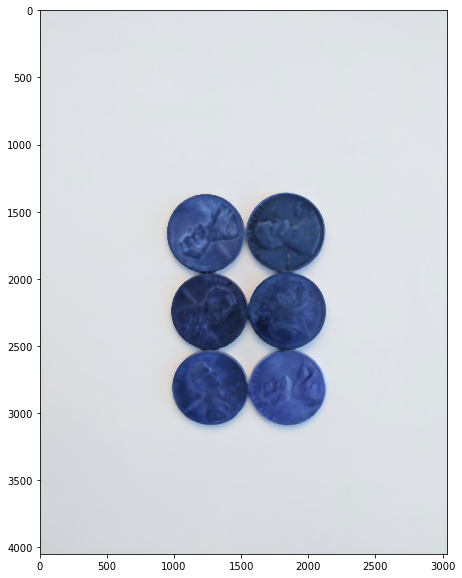

In [42]:
# 1) Median Blur
sep_blur = cv2.medianBlur(sep_coins,25)
display(sep_blur)

In [43]:
# 2) GrayScale
gray_sep_coins = cv2.cvtColor(sep_blur,cv2.COLOR_BGR2GRAY)

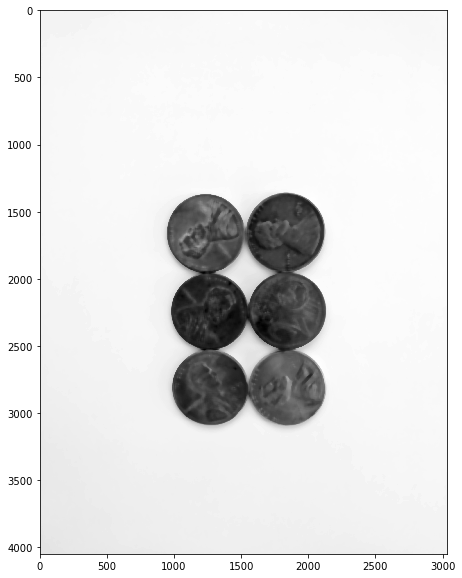

In [44]:
display(gray_sep_coins)

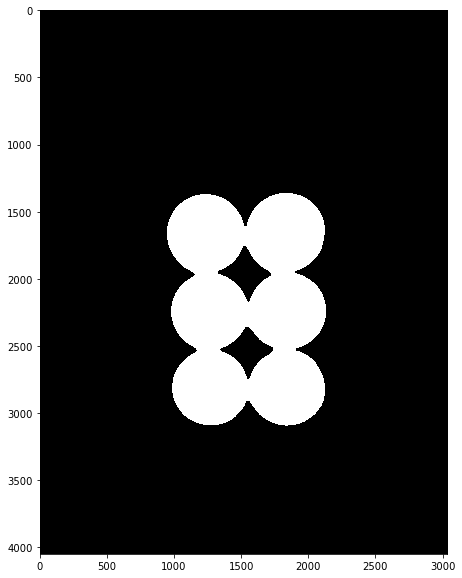

In [45]:
# 3) Binary threshold
ret,sep_thresh = cv2.threshold(gray_sep_coins,160,255,cv2.THRESH_BINARY_INV)
display(sep_thresh)

In [46]:
# 4) Find Contours
contours , hierarchy = cv2.findContours(sep_thresh.copy(),cv2.RETR_CCOMP,cv2.CHAIN_APPROX_SIMPLE)


In [47]:
for i in range(len(contours)):
    
    if hierarchy[0][i][3] == -1:
        cv2.drawContours(sep_coins,contours,i,(255,0,0),10)
        

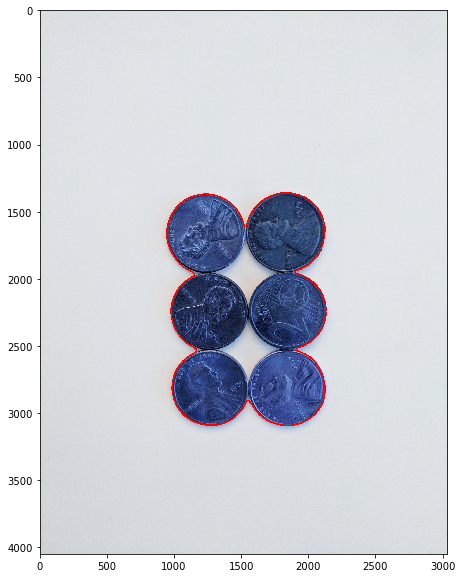

In [48]:
display(sep_coins)

In [49]:
# Note that: we find a gaint contour for all coins together so we will use the watershed 

In [50]:
img = cv2.imread('DATA/pennies.jpg')

In [51]:
# here we used a large bluring bec. the image is so big
img = cv2.medianBlur(img,35)

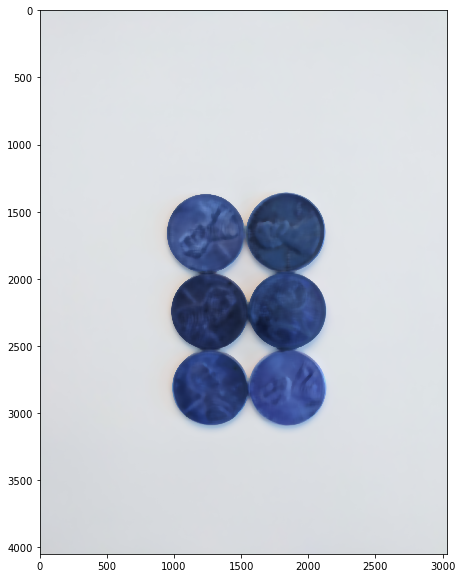

In [52]:
display(img)

In [53]:
gray = cv2.cvtColor(img , cv2.COLOR_BGR2GRAY)

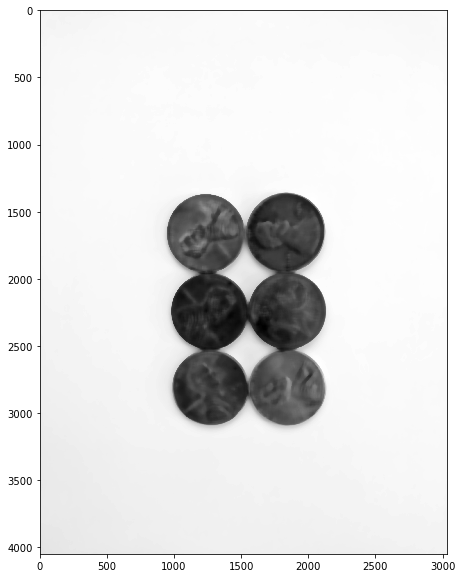

In [54]:
display(gray)

In [55]:
ret , thresh = cv2.threshold(gray ,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

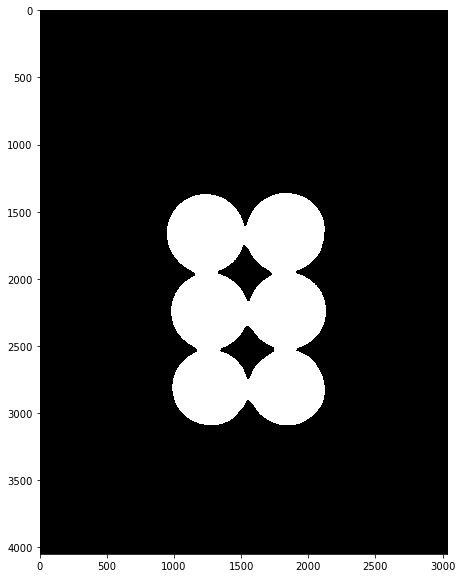

In [56]:
display(thresh)

In [57]:
# NOISE REMOVAL (OPTIONAL)

In [58]:
kernel = np.ones((3,3) , np.uint8)

In [59]:
kernel

array([[1, 1, 1],
       [1, 1, 1],
       [1, 1, 1]], dtype=uint8)

In [60]:
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel,iterations = 2)

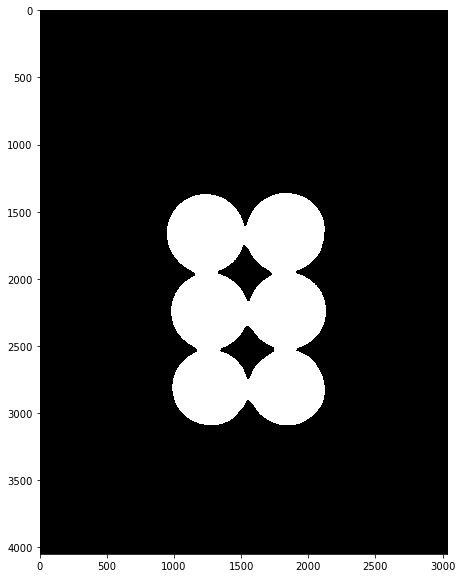

In [61]:
display(opening)

In [62]:
# distance transform : بدل ما الارقام كلها تبقى 0 و 1 او 0و 255  
# هنخلى كل ما تبعد عن ال0 تاخد رقم اعلى 
# 0 --> dark
# 1 --> lighter
#2 ---> more lighter

In [63]:
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)

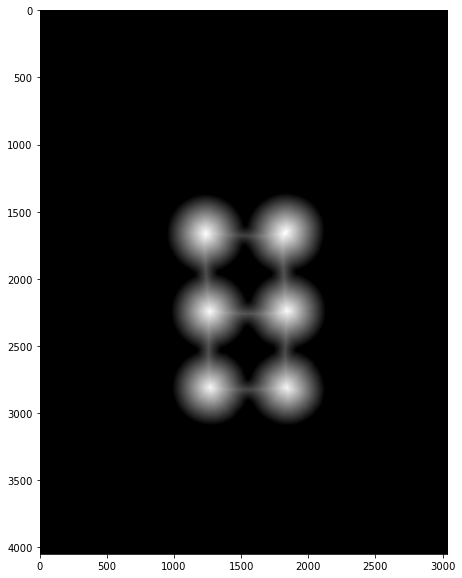

In [64]:
display(dist_transform)

In [65]:
ret , sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)

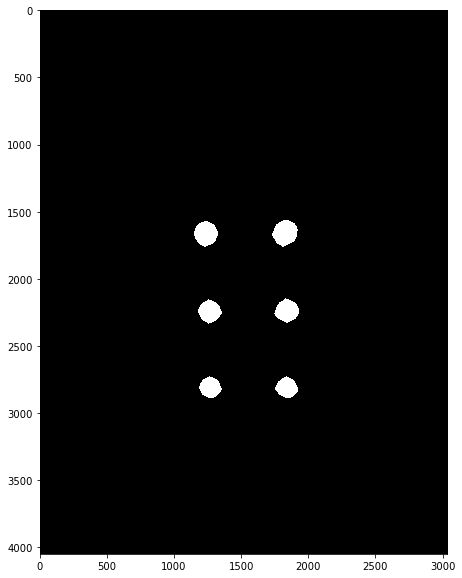

In [66]:
display(sure_fg)

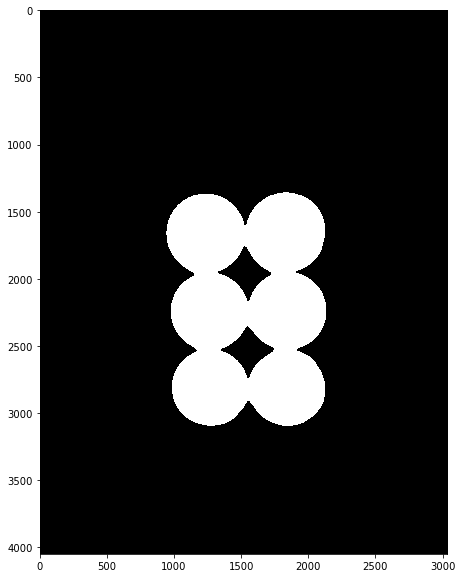

In [69]:
sure_bg = cv2.dilate(opening,kernel,iterations = 3)
display(sure_bg)   

In [70]:
# so it indicates some points but there are some regions in the real photo that is not indicated to be white (coin borders)
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)

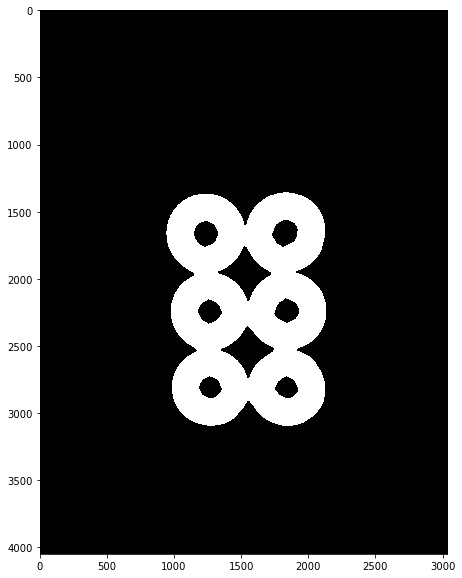

In [71]:
display(unknown)

In [72]:
ret , markers = cv2.connectedComponents(sure_fg)

In [74]:
markers =markers + 1

In [75]:
markers[unknown == 255] = 0

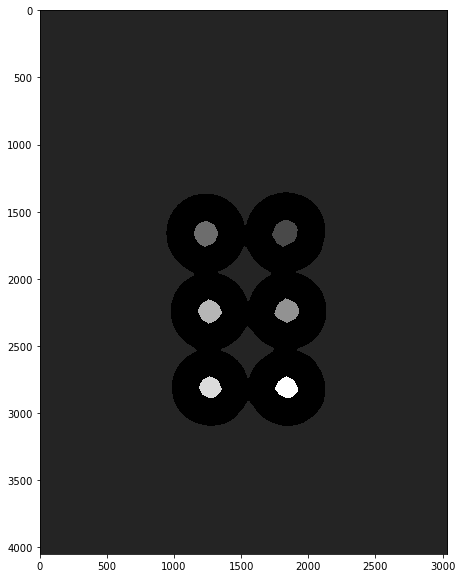

In [76]:
display(markers)

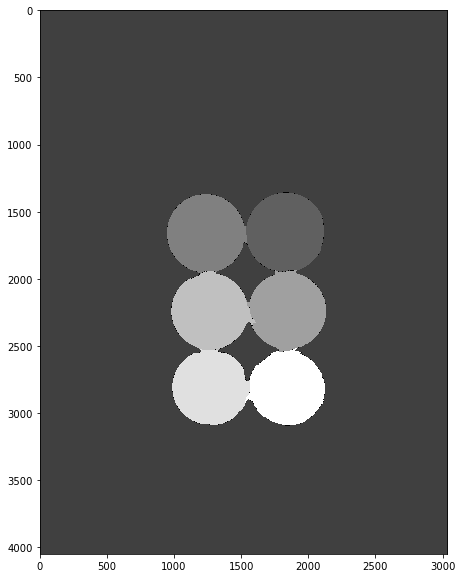

In [77]:
markers = cv2.watershed(img,markers)
display(markers)

In [78]:
contours , hierarchy = cv2.findContours(markers.copy(),cv2.RETR_CCOMP,cv2.CHAIN_APPROX_SIMPLE)
for i in range(len(contours)):
    
    if hierarchy[0][i][3] == -1:
        cv2.drawContours(sep_coins,contours,i,(255,0,0),10)
        

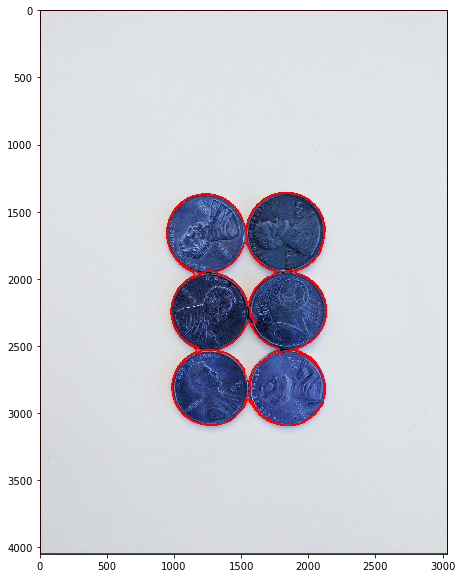

In [79]:
display(sep_coins)

 #### USING CUSTOM SEEDS WITH WATERSHED

In [80]:
road = cv2.imread('DATA/road_image.jpg')

In [81]:
road_copy = np.copy(road)

In [82]:
road.shape


(600, 800, 3)

In [83]:
marker_img = np.zeros(road.shape[:2],dtype = np.int32)
segments = np.zeros(road.shape,dtype = np.uint8)


In [84]:
from matplotlib import cm

In [85]:
tuple(np.array(cm.tab10(0)[:3])*255)
# gives us RED GREEN BLUE ratios in a tuble from tab10 colors 

(31.0, 119.0, 180.0)

In [86]:
def create_rgb(i):
    return tuple(np.array(cm.tab10(i)[:3])*255)


In [87]:
colors = [] 
for i in range(10):
    colors.append(create_rgb(i))

In [88]:
colors

[(31.0, 119.0, 180.0),
 (255.0, 127.0, 14.0),
 (44.0, 160.0, 44.0),
 (214.0, 39.0, 40.0),
 (148.0, 103.0, 189.0),
 (140.0, 86.0, 75.0),
 (227.0, 119.0, 194.0),
 (127.0, 127.0, 127.0),
 (188.0, 189.0, 34.0),
 (23.0, 190.0, 207.0)]

In [89]:
### 
# GLOBAL VARIABLES
# COLOR CHOICE
current_marker = 1
n_markers = 10 #0:9

# Markers updated by watershed
marks_updated = False


# CALLBACK FUNCTION
def mouse_callback(event , x,y,flags,param):
    global marks_updated
    
    if event == cv2.EVENT_LBUTTONDOWN:
        cv2.circle(marker_img,(x,y),10,(current_marker),-1)
        
        cv2.circle(road_copy,(x,y),10,colors[current_marker],-1)
        
        marks_updated =True

# WHILE TRUE

cv2.namedWindow('Road Image')
cv2.setMouseCallback('Road Image',mouse_callback)

while True:
    
    cv2.imshow('Waterdhed Segments' , segments)
    cv2.imshow('Road Image',road_copy)
    
    # CLOSE ALL WINDOWS
    k =cv2.waitKey(1)
    if k == 27:
        break
        
    elif k == ord('c'):
        road_copy = road.copy()
        marker_img = np.zeros(road.shape[:2],dtype = np.int32)
        segments = np.zeros(road.shape,dtype = np.uint8)
    
    
    
    # UPDATE COLOR CHOICE
    elif k > 0 and chr(k).isdigit():
        current_marker = int(chr(k))
        
    
    
    
    # UPDATE THE MARKINGS
    if marks_updated:
        
        marker_image_copy = marker_img.copy()
        cv2.watershed(road ,marker_image_copy)
        segments = np.zeros(road.shape,dtype = np.uint8)
        
        for color_ind in range(n_markers):
            segments[marker_image_copy == (color_ind)] = colors[color_ind]
            
            
cv2.destroyAllWindows()
            
        

### FACE DETECTION 

#### using haar cascades 

In [2]:
nadia = cv2.imread('DATA/Nadia_Murad.jpg',0)
denis = cv2.imread('DATA/Denis_Mukwege.jpg',0)
solvay = cv2.imread('DATA/solvay_conference.jpg',0)

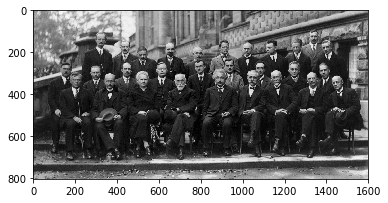

In [3]:
plt.imshow(solvay,cmap = 'gray')


In [4]:
face_cascade = cv2.CascadeClassifier('DATA/haarcascades/haarcascade_frontalface_default.xml')

In [5]:
def detect_face(img):
    face_img = img.copy()
    
    face_rects = face_cascade.detectMultiScale(face_img)
    
    for(x,y,w,h) in face_rects:
        cv2.rectangle(face_img , (x,y),(x+w,y+h),(255,255,255),10)
        
    return face_img

In [6]:
result = detect_face(solvay)

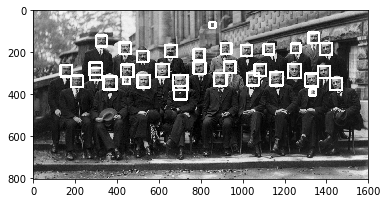

In [7]:
plt.imshow(result , cmap = 'gray')

In [8]:
def adj_detect_face(img):
    face_img = img.copy()
    
    face_rects = face_cascade.detectMultiScale(face_img , scaleFactor=1.2,minNeighbors = 5)
    
    for(x,y,w,h) in face_rects:
        cv2.rectangle(face_img , (x,y),(x+w,y+h),(255,255,255),10)
        
    return face_img

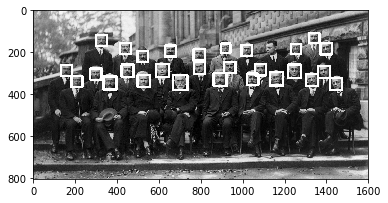

In [9]:
result = adj_detect_face(solvay)
plt.imshow(result,cmap = 'gray')

In [10]:
# EYE CASCADE
eye_cascade = cv2.CascadeClassifier('DATA/haarcascades/haarcascade_eye.xml')

In [11]:
def detect_eyes(img):
    face_img = img.copy()
    
    eye_rects = eye_cascade.detectMultiScale(face_img)
    
    for(x,y,w,h) in eye_rects:
        cv2.rectangle(face_img , (x,y),(x+w,y+h),(255,255,255),10)
        
    return face_img

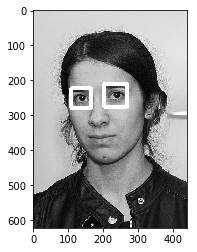

In [12]:
result = detect_eyes(nadia)
plt.imshow(result,cmap = 'gray')

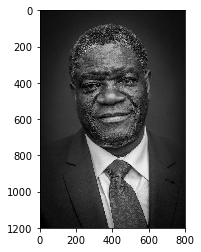

In [13]:
result = detect_eyes(denis)
plt.imshow(result,cmap = 'gray')
# We can't detect denis eyes bec of the contrast the photographer did on this photo 

In [15]:
cap =cv2.VideoCapture(0)

while True:
    
    ret,frame = cap.read(0)
    
    frame = detect_face(frame)
    
    cv2.imshow('Video Face Detect' , frame)
    
    k = cv2.waitKey(1)
    if k == 27:
        break
        
cap.release()
cv2.destroyAllWindows()
    
    